In [36]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 300

# E1)

For the first exercise we fill plot the potential of the fluxonium qubit for difference $\varphi_e$ which is
$$-E_J\cos(\varphi)+\frac{1}{2}E_L(\varphi+\varphi_e)^2$$ 
where $2\leq E_J/E_L\leq 10$. In the exercise it says to use a slider, but for a first version I'll just plot i for several $\varphi_e$


In [37]:
def potential(phi, phi_e, E_J=1, E_L=1):
    return -4*E_J*np.cos(phi)+E_L*(phi+phi_e)**2/2


phi_arr = np.linspace(-2*np.pi, 2*np.pi, 200)

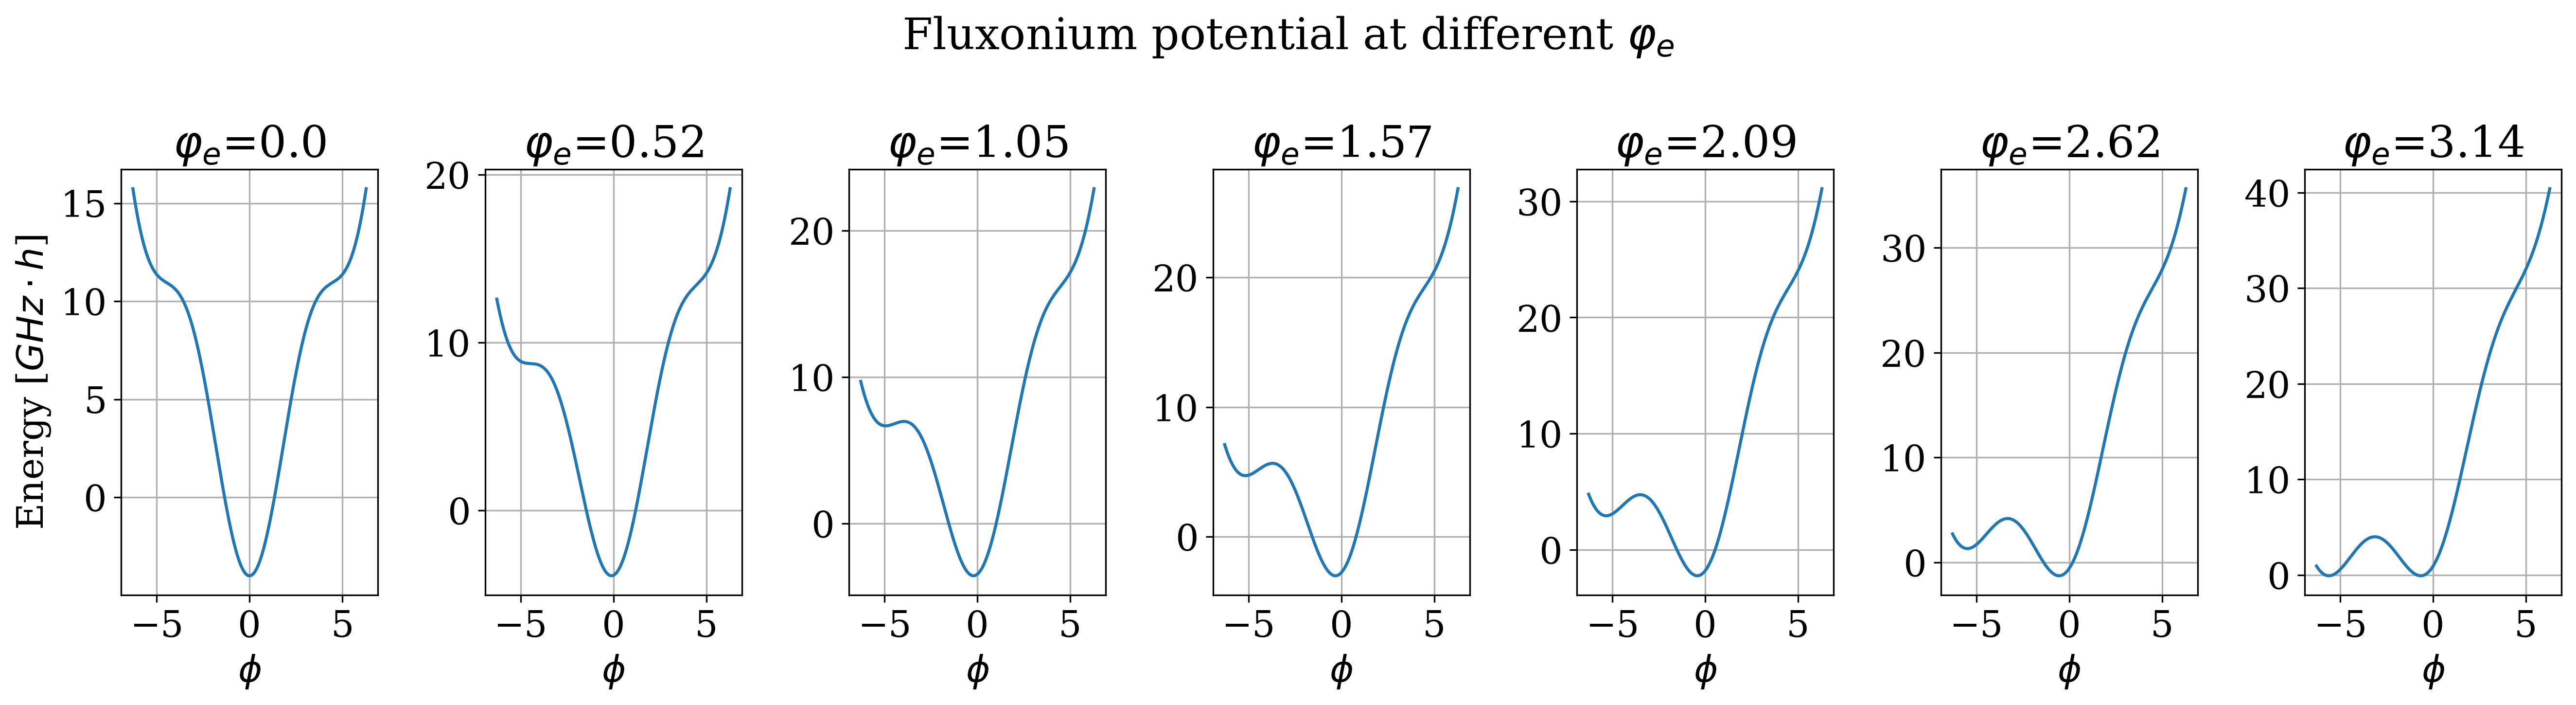

In [38]:
fig, ax = plt.subplots(1, 7, figsize = (18,5))

phi_e_arr = np.linspace(0, np.pi, 7)

for i in range(len(phi_e_arr)):
    ax[i].plot(phi_arr, potential(phi_arr, phi_e_arr[i]))
    ax[i].set_title("$\\varphi_e$="+str(np.round(phi_e_arr[i], 2)))
    ax[i].set_xlabel("$\phi$")
    
ax[0].set_ylabel("Energy [$GHz\cdot h$]")
plt.suptitle(r"Fluxonium potential at different $\varphi_e$")
plt.tight_layout()

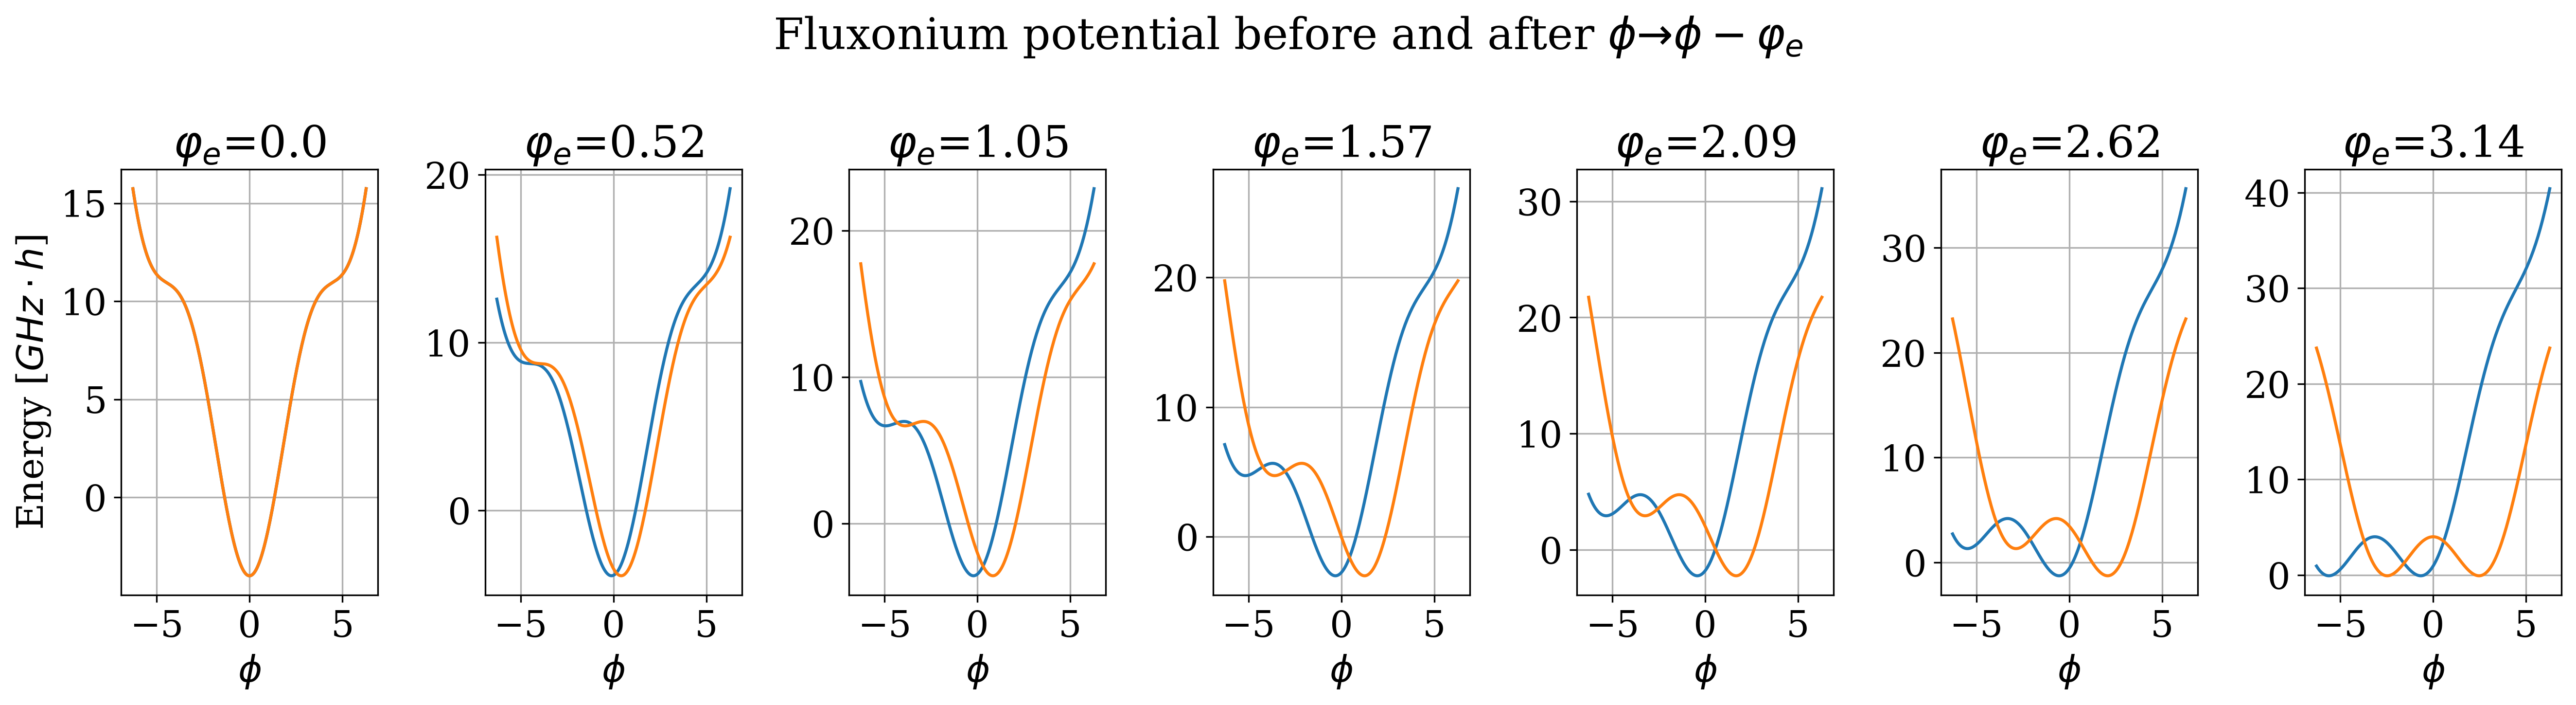

In [40]:
def potential_shifted(phi, phi_e):
    return -4*np.cos(phi-phi_e)+(phi)**2/2

fig, ax = plt.subplots(1, 7, figsize = (18,5))

for i in range(len(phi_e_arr)):
    ax[i].plot(phi_arr, potential(phi_arr, phi_e_arr[i]))
    ax[i].plot(phi_arr, potential_shifted(phi_arr, phi_e_arr[i]))
    ax[i].set_title("$\\varphi_e$="+str(np.round(phi_e_arr[i], 2)))
    ax[i].set_xlabel("$\phi$")
    
ax[0].set_ylabel("Energy [$GHz\cdot h$]")
plt.suptitle(r"Fluxonium potential before and after $\phi\to\phi-\varphi_e$")
plt.tight_layout()

Unsurprisingly such a coordinate transformation simply shiftes the potential to the side. In one case the quadratic part gets shifted to one side, and in the other case the cosine part gets shifted to the other side.

# E2)

First we define the Hamiltonian in the flux basis

In [26]:
N = 200 #resolution
cutoff = 2*np.pi
delta = 2*cutoff/N #Spacing between points
phi = np.linspace(-cutoff, cutoff, N)

def normalize(wavefunction):
    normalized_wavefunction = 1/np.sqrt(delta * (wavefunction.T)@(np.conj(wavefunction))) * wavefunction
    #normalized_wavefunction = 1/np.sqrt((wavefunction.T)@(np.conj(wavefunction))) * wavefunction
    return normalized_wavefunction

def fluxonium_potential(phi, phi_e, E_J, E_L):
    return E_L/2 * (phi)**2-E_J*np.cos(phi-phi_e)

def Hamiltonian(E_Ch, E_Lh, E_Jh):
    diagArr = np.ones(N)
    offDiagArr = np.ones(N-1)
    q2Matrix = 1/delta**2 * (2*np.diag(diagArr) - np.diag(offDiagArr, k = 1) - np.diag(offDiagArr, k = -1))

    #Potential matrix
    pot = fluxonium_potential(phi, np.pi, E_J=E_Jh, E_L=E_Lh)
    potMatrix = np.diag(pot)

    return 4*E_Ch* q2Matrix + potMatrix, pot, E_Jh

#eigenvalues, eigenvectors = sc.sparse.linalg.eigs(H, k=7, which = "SR")  

Text(0.5, 1.0, 'Fluxonium States')

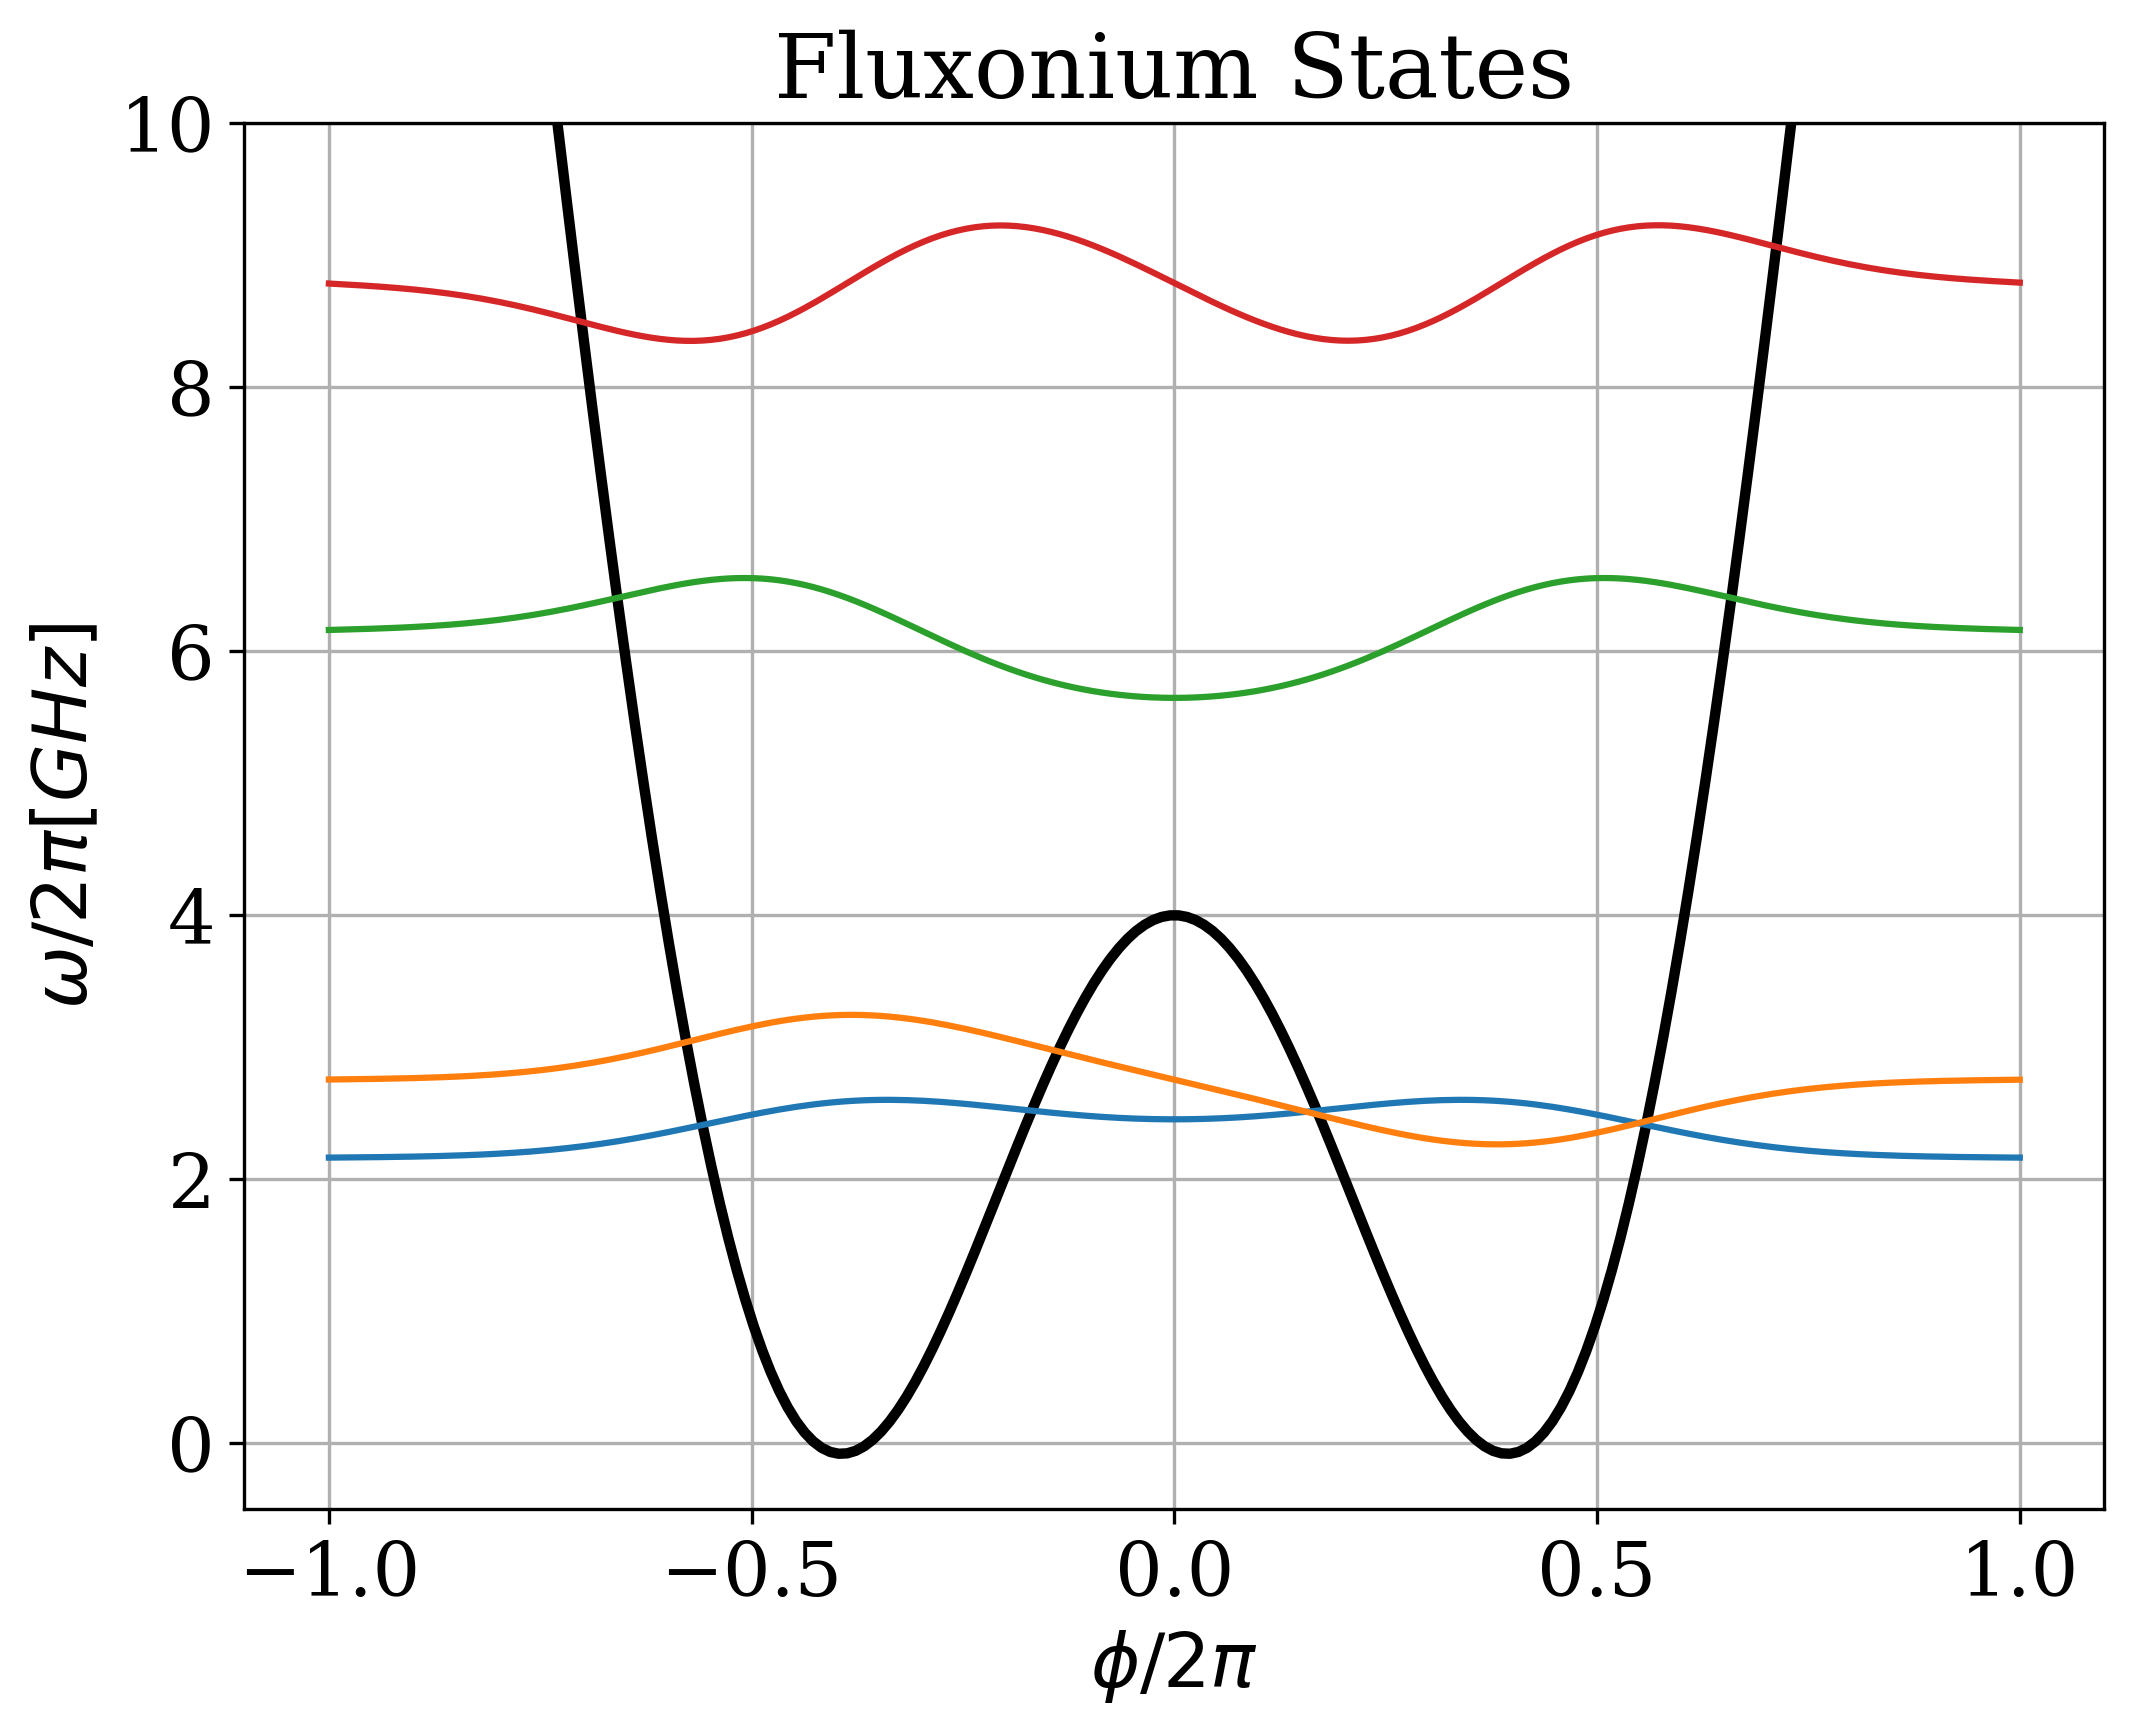

In [42]:
H, potential1, scale = Hamiltonian(1, 1, 4)

eigenvalues, eigenvectors = sc.sparse.linalg.eigsh(H, k=7, which = "SA") 

plt.plot(phi/(2*np.pi), potential1, color = "black", linewidth = 2.5)

for i in range(4):
    plt.plot(phi/(2*np.pi), normalize(eigenvectors[:,i])+eigenvalues[i])

plt.ylim(-0.5, 10)
plt.xlabel(r"$\phi/2\pi$") 
plt.ylabel(r"$\omega/2\pi[GHz]$")
plt.title("Fluxonium States")


In [28]:
offset_flux_arr = np.linspace(0, 2*np.pi, 200)

omega01 = np.zeros_like(offset_flux_arr)
omega12 = np.zeros_like(offset_flux_arr)
omega02 = np.zeros_like(offset_flux_arr)


for i in range(len(offset_flux_arr)):
    diagArr = np.ones(N)
    offDiagArr = np.ones(N-1)
    q2Matrix = 1/delta**2 * (2*np.diag(diagArr) - np.diag(offDiagArr, k = 1) - np.diag(offDiagArr, k = -1))

    #Potential matrix
    pot = fluxonium_potential(phi, offset_flux_arr[i], E_J=4, E_L=1)
    potMatrix = np.diag(pot)

    H = 4*1* q2Matrix + potMatrix

    eigenvalues, eigenvectors = sc.sparse.linalg.eigsh(H, k=3, which = "SA")
    eigenvalues = eigenvalues.real
    omega01[i]=eigenvalues[1]-eigenvalues[0]
    omega12[i]=eigenvalues[2]-eigenvalues[1]
    omega02[i]=eigenvalues[2]-eigenvalues[0]

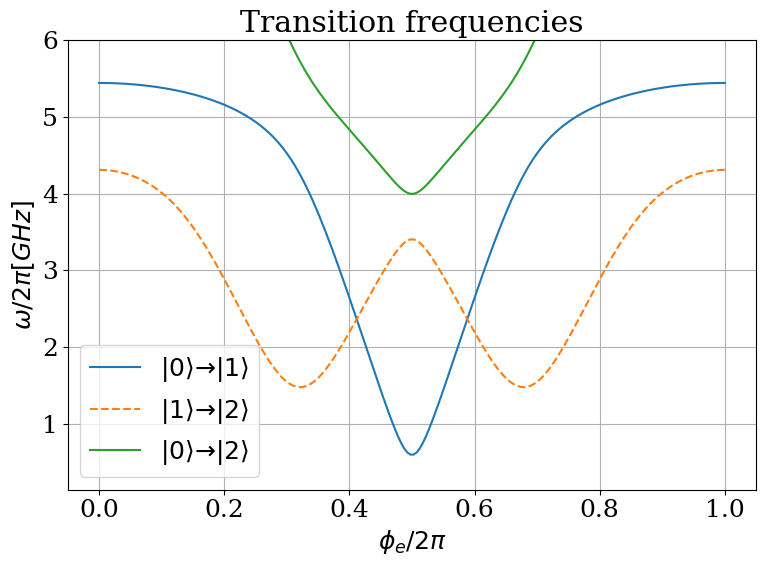

In [29]:
plt.plot(offset_flux_arr/(2*np.pi), omega01, label = r"$|0\rangle\to|1\rangle$")
plt.plot(offset_flux_arr/(2*np.pi), omega12, "--", label = r"$|1\rangle\to|2\rangle$")
plt.plot(offset_flux_arr/(2*np.pi), omega02, label = r"$|0\rangle\to|2\rangle$")
plt.ylim(top=6)

plt.xlabel(r"$\phi_e/2\pi$") 
plt.ylabel(r"$\omega/2\pi[GHz]$")
plt.title("Transition frequencies")

plt.legend()
plt.tight_layout()

### c)

In [30]:
from scipy.constants import hbar, Boltzmann as kB
#Define the relevant constants
w = 2*np.pi*5*1e9
T = 0.02
E_c = 1
Q_diel = 5*1e6